In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data = pd.read_csv("transfusion.data", names = ["last donation", "total donations frequency", "total blood donation", "first donation", "donation in March 2007"], header = 0)
data = data.sample(frac = 1).reset_index(drop = True)
X = data[["last donation", "total donations frequency", "total blood donation", "first donation"]]
Y = data["donation in March 2007"]
data

,last donation,total donations frequency,total blood donation,first donation,donation in March 2007
0,4,2,500,41,0
1,18,8,2000,95,0
2,14,3,750,35,0
3,14,3,750,41,0
4,2,2,500,2,0
...,...,...,...,...,...
743,3,21,5250,42,1
744,14,1,250,14,0
745,4,5,1250,11,1
746,4,5,1250,58,0


## Data preparation
<br>
<div style="font-size:20px;direction:LTR">
To learn the decision tree we need the data to be discrete. In this section we prepare the required data of the decision tree.
The dis and sub_dis functions are for this purpose. To disassemble the data, we first find the best point that gives us the most information gain. The data is then divided into two parts. Now, to reach more categories, we repeat the same process on the two obtained categories.
    The cal_antropy function also calculates a batch by taking the entropy label<br>
    </div>

In [ ]:
def cal_antropy(labels):
    n = len(labels)
    temp = 0
    for label in labels:
        if label == 1:
            temp += 1
    try:
        antropy = -(temp / n * math.log(temp / n, 2) + (n - temp) / n * math.log((n - temp) / n, 2))
    except:
        antropy = 0
    return antropy

def dis(data, feature, subset_number):
    df = data.sort_values(by=feature, ascending=True)
    Y = list(df["donation in March 2007"])
    X = list(df[feature])
    n = len(Y)
    
    if (subset_number == 0 or not X):
        return []
    
    
    candidates = []
    for i in range(1, len(Y)):
        if Y[i] != Y[i-1]:
            candidates.append(i)
    
    antropies = [(cal_antropy(Y[:i]) * i + cal_antropy(Y[i:]) * (n - i)) / n for i in candidates]
    best_threshold_indice = candidates[np.argmin(antropies)]
    best_threshold = X[best_threshold_indice]
    
    left_subset_number = math.floor(subset_number / 2)
    
    left_thresholds = sub_dis(X[:best_threshold_indice], Y[:best_threshold_indice], left_subset_number)
    right_thresholds = sub_dis(X[best_threshold_indice:], Y[best_threshold_indice:], subset_number - left_subset_number)
    
#     print(left_thresholds + [best_threshold] + right_thresholds + [X[-1]])
    boundries = sorted(list(set(left_thresholds + [best_threshold] + right_thresholds + [X[-1]])))
    
    X = data[feature]
    for i in range(len(X)):
        for j in range(len(boundries)):
            if X[i] <= boundries[j]:
                X[i] = j
                break
    
#     return boundries

    
    
def sub_dis(X, Y, subset_number):
    n = len(Y)
    if (subset_number == 0 or not X):
        return []
    if (subset_number == 1):
        return []
    
    
    candidates = []
    for i in range(1, len(Y)):
        if Y[i] != Y[i-1]:
            candidates.append(i)
            
    if (not candidates):
        return [X[-1]]
            
    antropies = [(cal_antropy(Y[:i]) * i + cal_antropy(Y[i:]) * (n - i)) / n for i in candidates]
    best_threshold_indice = candidates[np.argmin(antropies)]
    best_threshold = X[best_threshold_indice]
    
    left_subset_number = math.floor(subset_number / 2)
    
    left_thresholds = sub_dis(X[:best_threshold_indice], Y[:best_threshold_indice], left_subset_number)
    right_thresholds = sub_dis(X[best_threshold_indice:], Y[best_threshold_indice:], subset_number - left_subset_number)
    
    
    return left_thresholds + [best_threshold] + right_thresholds 
    

# print(Y[5:])
data_discrite = data.copy()
dis(data_discrite, "last donation", 6)
dis(data_discrite, "total donations frequency", 6)
dis(data_discrite, "total blood donation", 6)
dis(data_discrite, "first donation", 6)

classes_num = {"last donation": max(data_discrite["last donation"]) + 1,
                            "total donations frequency" : max(data_discrite["total donations frequency"]) + 1,
                            "total blood donation" : max(data_discrite["total blood donation"]) + 1,
                            "first donation" : max(data_discrite["first donation"]) + 1}


X_discrite = data_discrite[["last donation", "total donations frequency", "total blood donation", "first donation"]]
Y_discrite = data_discrite["donation in March 2007"]
border = int(len(X_discrite) * 4 / 5)
X_discrite_train, Y_discrite_train = X_discrite[:border], np.array(Y[:border])
X_discrite_test, Y_discrite_test = X_discrite[border:], np.array(Y[border:])

X_discrite_test = X_discrite_test.reset_index(drop = True)

data_discrite


,last donation,total donations frequency,total blood donation,first donation,donation in March 2007
0,0,1,1,1,0
1,2,2,2,2,0
2,2,1,1,1,0
3,2,1,1,1,0
4,0,1,1,0,0
...,...,...,...,...,...
743,0,3,3,1,1
744,2,0,0,1,0
745,0,2,2,1,1
746,0,2,2,2,0


<div style="font-size:20px;direction:LTR"> In this section we prepare the data for logistic regression. This requires the data to be normalized. In the following section, we have scaled the data very easily between -1 and 1, by dividing each column by the maximum data of that column and then minus 1.
    </div>

In [ ]:
X_logistic = pd.DataFrame(data = {"last donation": 2 * X["last donation"] / max(X["last donation"] - 1),
                            "total donations frequency" : 2 * X["total donations frequency"] / max(X["total donations frequency"] - 1),
                            "total blood donation" : 2 * X["total blood donation"] / max(X["total blood donation"] - 1),
                            "first donation" : 2 * X["first donation"] / max(X["first donation"] - 1)})
X_logistic = np.c_[X_logistic, np.ones((len(X),1))]
border = int(len(X_logistic) * 4 / 5)
X_logistic_train, Y_logistic_train = X_logistic[:border], np.array(Y[:border])
X_logistic_test, Y_logistic_test = X_logistic[border:], np.array(Y[border:])

## 1 
## logistic regression model
<br>
<div style="font-size:20px;direction:LTR">
 Now we train the logistic regression model. Because we do not have a closed form for the answer, the gradient_descent function finds the answer for us. Also, the related parameters can be passed to the model. We have two other functions to change the model threshold (for use in part 3) as well as predictions
    </div>

In [ ]:
class logistic_regression:
    
    def __init__(self, X, Y, learning_rate = 0.01, iterations = 300):
        self.W = logistic_regression.gradient_descent(X, Y, learning_rate = learning_rate, iterations = iterations)
        self.threshold = 0.5
        
    def set_threshold(self, threshold):
        self.threshold = threshold
        
    def predict(self, X):
        return 1 if 1 / (1 + math.exp(-np.dot(self.W, X))) >= self.threshold else 0
    
    @staticmethod   
    def gradient_descent(X,Y,W = [0, 0, 0, 0, 0], learning_rate=0.01, iterations=300):
        for it in range(iterations):
            sigmoids = [1 / (1 + math.exp(-np.dot(W, X[i]))) for i in range(len(X))]

            E = [(sigmoids[i] - Y[i]) * X[i] for i in range(len(sigmoids))]
            W = W - learning_rate * sum([(sigmoids[i] - Y[i]) * X[i] for i in range(len(sigmoids))])
        return W
    
    

logistic_regressor = logistic_regression(X_logistic_train, Y_logistic_train)

## Decision Tree
<br>
<div style="font-size:20px;direction:LTR">
In this part, we train the decision tree. On the calculation of entropy and information gain, we have two functions cal_antropy and cal_information_gain, the first of which receives the entropy of the input data and the second with the received data and also a feature that determines how much information gain we have if we divide the data based on the received feature.
    We also have a node class that actually corresponds to our nodes in the decision tree. We also make the decision tree recursively. Using the best_feature function, we find the best feature in terms of information_gain, and then using the sub_nodes function, we find the bottom nodes of the node we are in. Now, using the make_sub_tree function, we extend each of the nodes under its nodes.
    </div>

In [ ]:
def cal_antropy(labels):
    n = len(labels)
    temp = 0
    for label in labels:
        if label == 1:
            temp += 1
    try:
        antropy = -(temp / n * math.log(temp / n, 2) + (n - temp) / n * math.log((n - temp) / n, 2))
    except:
        antropy = 0
    return antropy

def cal_information_gain(X, Y, feature):
    n = len(Y)
    current_antropy = cal_antropy(Y)
    class_num = classes_num[feature]
    information_gain = []
    subset_lengths = []
    for i in range(class_num):
        indices = X[feature] == i
        new_Y = Y[indices]
        information_gain.append((current_antropy - cal_antropy(new_Y)) * len(indices) / n)
    return sum(information_gain)

class decision_tree:
    
    def __init__(self, X, Y, features):
        self.threshold = 0.5
        self.root = tree_node(X, Y)
        feature = decision_tree.best_feature(self.root.X, self.root.Y, features)
        self.root.sub_nodes = decision_tree.sub_nodes(self.root, feature)
        self.root.feature = feature
        features_left = features.copy()
        features_left.remove(feature)
        for sub_node in self.root.sub_nodes:
            decision_tree.make_sub_tree(sub_node, features_left)
        return
        
    def set_threshold(self, threshold):
        self.threshold = threshold
        
    @staticmethod
    def make_sub_tree(node, features):
        if features:
            if(len(node.X) != 0):
                feature = decision_tree.best_feature(node.X, node.Y, features)
                node.sub_nodes = decision_tree.sub_nodes(node, feature)
                node.feature = feature
                features_left = features.copy()
                features_left.remove(feature)
                for sub_node in node.sub_nodes:
                        decision_tree.make_sub_tree(sub_node, features_left)
        
    @staticmethod
    def best_feature(X, Y, features):
        feature = features[0]
        information_gain = cal_information_gain(X, Y, feature)
        for i in range(1, len(features)):
            temp_gain = cal_information_gain(X, Y, features[i])
            if temp_gain > information_gain:
                information_gain = temp_gain
                feature = features[i]
        return feature
    
    @staticmethod
    def sub_nodes(node, feature):
        X = node.X
        Y = node.Y
        class_num = classes_num[feature]
        sub_X = []
        sub_Y = []
        sub_nodes = []
        for i in range(class_num):
            indices = X[feature] == i
            sub_nodes.append(tree_node(X[indices], Y[indices]))
        return sub_nodes
    
    def predict(self, x):
        node = self.root
        while (True):
            if len(node.X) == 0 or not node.sub_nodes:
                break
            feature = node.feature
            node = node.sub_nodes[x[feature]]
        n = len(node.X)
        if n == 0:
            return 0
        positives_prob = sum(node.Y == 1) / n
        return 1 if positives_prob >= self.threshold else 0

class tree_node:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.sub_nodes = []
        
DT = decision_tree(X_discrite_train, Y_discrite_train, ['last donation', 'total donations frequency', 'total blood donation', 'first donation'])


## metrics
<div style="font-size:20px;direction:RTL">
In this section, we first implement the cal_metrics pan, which calculates and returns the precision recall f1-score by taking the main list of labels as well as the forecast list.
    After that, for each of the logistic and decision tree models, we performed the prediction on the test data and printed the result.
    </div>

In [ ]:
def cal_metrics(Y_pred, Y_act):
    tp = fp = tn = fn = 0
    
    for i in range(len(Y_pred)):
        if(Y_pred[i] == 1 and Y_act[i] == 1):
            tp += 1
        elif(Y_pred[i] == 0 and Y_act[i] == 0):
            tn += 1
        elif(Y_pred[i] == 0 and Y_act[i] == 1):
            fn += 1
        else:
            fp += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    try:
        precision = tp / (tp + fp)
    except:
        precision = 0
    recall = tp / (tp + fn)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except:
        f1 = 0
    return accuracy, recall, f1
   

# logistic regressor prediction

# logistic_regressor.set_threshold(0.5)
y_pred = []
for i in range(len(X_logistic_test)):
    pred = logistic_regressor.predict(X_logistic_test[i])
    y_pred.append(pred)
logisitic_accuracy, logisitic_recall, logisitic_f1 = cal_metrics(y_pred, Y_logistic_test)
print('logistic regression: \naccuracy = {} \t recall = {} \t f1 = {}'.format(logisitic_accuracy, logisitic_recall, logisitic_f1))

# decision tree prediction

# DT.set_threshold(0.5)
y_pred = []
for i in range(len(X_discrite_test)):
    pred = DT.predict(X_discrite_test.iloc[i])
    y_pred.append(pred)
DT_accuracy, DT_recall, DT_f1 = cal_metrics(y_pred, Y_discrite_test)
print('logistic regression: \naccuracy = {} \t recall = {} \t f1 = {}'.format(DT_accuracy, DT_recall, DT_f1))


logistic regression: 
accuracy = 0.7733333333333333 	 recall = 0.08333333333333333 	 f1 = 0.15
logistic regression: 
accuracy = 0.8333333333333334 	 recall = 0.5833333333333334 	 f1 = 0.626865671641791


## 2

<p style="font-size: 20px;direction:LTR" >The reason for the low recall and f1-score is that about 75% of our data belongs to class 0, which makes our models can not separate classes 1 well. Also, except for the first feature of the data, the rest of them do not have a specific information gain, and this makes the data not separate in general. In order to have a better recall, which also leads to a better f1-score, the threshold value can be reduced to less than 0.5 so that the models have more flexibility for separating Class 1 data.
<br>
The following figure shows the class diagram based on the first feature, which shows the amount of class separation. The rest of the feature charts do not show anything special.
</p>

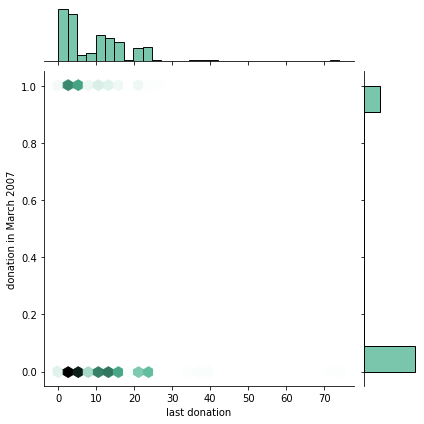

In [ ]:
# data = pd.read_csv("transfusion.data", names = ["last donation", "total donations frequency", "total blood donation", "first donation", "donation in March 2007"], header = 0)

# sns.scatterplot(data=data, x='last donation', y='donation in March 2007', hue='donation in March 2007');
sns.jointplot(x=data["last donation"], y=data["donation in March 2007"], kind="hex", color="#4CB391");

## 3
<div style="font-size:20px;direction:ltr">
In this section, we first use the set_threshold function, which was coded in the first part, to change the threshold value in such a way that we achieve acceptable results. Because about 20 to 25 percent of the data is from Class 1, it seems that threshold Deniz is slightly better with a little more.
    </div>

In [ ]:
# logistic regressor prediction
logistic_regressor.set_threshold(0.3)

y_pred = []
for i in range(len(X_logistic_test)):
    pred = logistic_regressor.predict(X_logistic_test[i])
    y_pred.append(pred) 
logisitic_accuracy, logisitic_recall, logisitic_f1 = cal_metrics(y_pred, Y_logistic_test)
print('logistic regression: \naccuracy = {} \t recall = {} \t f1 = {}'.format(logisitic_accuracy, logisitic_recall, logisitic_f1))



# decision tree prediction
DT.set_threshold(0.25)

y_pred = []
for i in range(len(X_discrite_test)):
    pred = DT.predict(X_discrite_test.iloc[i])
    y_pred.append(pred)
DT_accuracy, DT_recall, DT_f1 = cal_metrics(y_pred, Y_discrite_test)
print('Decision Tree: \naccuracy = {} \t recall = {} \t f1 = {}'.format(DT_accuracy, DT_recall, DT_f1))


logistic regression: 
accuracy = 0.6933333333333334 	 recall = 0.7222222222222222 	 f1 = 0.5306122448979592
Decision Tree: 
accuracy = 0.7533333333333333 	 recall = 0.7222222222222222 	 f1 = 0.5842696629213483


<p style="font-size: 20px;direction:ltr"> As you can see, we were able to increase the recall and f1-score at the expense of reducing the precision, but further reducing the threshold causes a very large reduction in precision, which is not desirable.</p>

## 4
<p style="font-size: 20px;direction:ltr">
In this section, we want to train the adaBoost classifier. The adaBoost_classifier class is for this purpose. Its inputs are our data and m, which specifies the number of stumps. In the train_model function, we train the model. In this way, first the weight of all data is equal. Then, in each step, using the best_stump function, we find the best tree with a depth of one that has the least weight error. In fact, we choose the best between 4 different stumps, each made on one of the X features. After selecting the best stump, we use it to get its alpha value and then update the data weight.
    The set_threshold function is also used to change the thresholds of the stumps, which will be used in the next section
    </p>

In [ ]:
class adaBoost_classifier:
    def __init__(self, X, Y, m):
        self.train_model(X, Y, m)
        self.thresholds = 0.5
        
    def train_model(self, X, Y, m):
        n = len(X)
        W = [1/n] * n
        stumps = []
        alphas = []
        for i in range(m):
            stump, stump_error = adaBoost_classifier.best_stump(X, Y, W)
            stumps.append(stump)
            epsilon = stump_error / sum(W)
            alphas.append(math.log((1 - epsilon) / epsilon))
            for j in range(len(W)):
                if (stump.predict(X.iloc[j]) != Y[j]):
                    W[j] = W[j] * math.exp(alphas[i])
        self.stumps = stumps
        self.alphas = alphas
    
    def set_threshold(self, threshold):
        for stump in self.stumps:
            stump.set_threshold(threshold)
        
    def predict(self, X):
        pred = sum([self.alphas[i] * self.stumps[i].predict(X) for i in range(len(self.alphas))])
        return 1 if pred > 0.5 else 0
        
    @staticmethod
    def best_stump(X, Y, W):
        features = X.columns
        dt = decision_tree(X, Y, [features[0]])
#         dt.set_threshold(0.3)
        error = adaBoost_classifier.cal_error(dt, X, Y, W)
        for i in range(1, len(features)):
            temp_dt = decision_tree(X, Y, [features[i]])
#             temp_dt.set_threshold(0.3)
            temp_error = adaBoost_classifier.cal_error(temp_dt, X, Y, W)
            if temp_error < error:
                error = temp_error
                dt = temp_dt
        return dt, error
        
        
    @staticmethod
    def cal_error(DT, X, Y, W):
        error = 0
        for i in range(len(X)):
            pred = DT.predict(X.iloc[i])
            if pred != Y[i]:
                error += W[i]
        return error
                
adaBoost_Cl = adaBoost_classifier(X_discrite_train, Y_discrite_train, 4)

<p style="font-size: 20px;direction:ltr">
In this section, we have obtained the model prediction test and printed its metrics
    </p>

In [ ]:
# adaBoost_Cl.set_threshold(0.5)

y_pred = []
for i in range(len(X_discrite_test)):
    pred = adaBoost_Cl.predict(X_discrite_test.iloc[i])
    y_pred.append(pred)
    
DT_accuracy, DT_recall, DT_f1 = cal_metrics(y_pred, Y_discrite_test)
print('adaBoost: \naccuracy = {} \t recall = {} \t f1 = {}'.format(DT_accuracy, DT_recall, DT_f1))
# adaBoost_Cl.predict(X_discrite_train.iloc[10])

adaBoost: 
accuracy = 0.76 	 recall = 0.027777777777777776 	 f1 = 0.05263157894736842


<p style="font-size:20px;direction:ltr"> As can be seen, due to the large amount of Class 0 data, our category estimates almost all points in Class 0, causing the recall and f1-score to be very low. Now we solve this problem by changing the threshold of the used decision trees
    </p>

In [ ]:
adaBoost_Cl.set_threshold(0.3)

y_pred = []
for i in range(len(X_discrite_test)):
    pred = adaBoost_Cl.predict(X_discrite_test.iloc[i])
    y_pred.append(pred)
    
DT_accuracy, DT_recall, DT_f1 = cal_metrics(y_pred, Y_discrite_test)
print('adaBoost: \naccuracy = {} \t recall = {} \t f1 = {}'.format(DT_accuracy, DT_recall, DT_f1))

adaBoost: 
accuracy = 0.64 	 recall = 0.7222222222222222 	 f1 = 0.490566037735849
